# Analyzing Little Women as a Social Graph of Characters


# Importing Required Packages & Libraries

In [1]:
from google.colab import files
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from networkx.algorithms import centrality
from networkx.algorithms import community

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Loading the Text File & Preprocessing the Text

**For this task, I've downloaded and used a plain text version of the novel "Little Women" by Louisa May Alcott from Project Gutenberg.**

In [2]:
uploaded = files.upload()

Saving littlewomen.txt to littlewomen (1).txt


In [3]:
file_name = 'littlewomen.txt'
with open(file_name, 'r', encoding='utf-8') as file:
    text = file.read()

In [4]:
print(text)

The Project Gutenberg eBook of Little Women
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Little Women


Author: Louisa May Alcott

Release date: May 1, 1996 [eBook #514]
                Most recently updated: November 4, 2022

Language: English



*** START OF THE PROJECT GUTENBERG EBOOK LITTLE WOMEN ***



Little Women

by Louisa May Alcott


Contents

 PART 1
 CHAPTER ONE PLAYING PILGRIMS
 CHAPTER TWO A MERRY CHRISTMAS
 CHAPTER THREE THE LAURENCE BOY
 CHAPTER FOUR BURDENS
 CHAPTER FIVE BEING NEIGHBORLY
 CHAPTER SIX BETH FINDS THE PALACE BEAUTIFUL
 CHAPTER SEVEN AMY’S VALLEY OF HUM

In [5]:
def preprocess(text):
    header_pattern = re.compile(r'\*\*\* START OF (THE|THIS) PROJECT GUTENBERG EBOOK .* \*\*\*|\*\*\* END OF (THE|THIS) PROJECT GUTENBERG EBOOK .* \*\*\*|This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever.')
    copyright_pattern = re.compile(r'\(C\) \d{4} .* Project Gutenberg')
    text = re.sub(header_pattern, '', text)
    text = re.sub(copyright_pattern, '', text)
    start_pattern = re.compile(r'Updated editions will replace the previous one—the old editions will.*?START: FULL LICENSE', re.DOTALL)
    end_pattern = re.compile(r'Section 5. General Information About Project Gutenberg™ electronic works', re.DOTALL)
    start_match = start_pattern.search(text)
    end_match = end_pattern.search(text)
    if start_match and end_match:
        text = text[:start_match.start()] + text[end_match.end():]
    header_pattern2 = re.compile(r'The Project Gutenberg eBook of Little Women.*?Language: English', re.DOTALL)
    header_match = header_pattern2.search(text)
    if header_match:
        text = text[header_match.end():]
    return text

text = preprocess(text)

In [6]:
print(text)









Little Women

by Louisa May Alcott


Contents

 PART 1
 CHAPTER ONE PLAYING PILGRIMS
 CHAPTER TWO A MERRY CHRISTMAS
 CHAPTER THREE THE LAURENCE BOY
 CHAPTER FOUR BURDENS
 CHAPTER FIVE BEING NEIGHBORLY
 CHAPTER SIX BETH FINDS THE PALACE BEAUTIFUL
 CHAPTER SEVEN AMY’S VALLEY OF HUMILIATION
 CHAPTER EIGHT JO MEETS APOLLYON
 CHAPTER NINE MEG GOES TO VANITY FAIR
 CHAPTER TEN THE P.C. AND P.O.
 CHAPTER ELEVEN EXPERIMENTS
 CHAPTER TWELVE CAMP LAURENCE
 CHAPTER THIRTEEN CASTLES IN THE AIR
 CHAPTER FOURTEEN SECRETS
 CHAPTER FIFTEEN A TELEGRAM
 CHAPTER SIXTEEN LETTERS
 CHAPTER SEVENTEEN LITTLE FAITHFUL
 CHAPTER EIGHTEEN DARK DAYS
 CHAPTER NINETEEN AMY’S WILL
 CHAPTER TWENTY CONFIDENTIAL
 CHAPTER TWENTY-ONE LAURIE MAKES MISCHIEF, AND JO MAKES PEACE
 CHAPTER TWENTY-TWO PLEASANT MEADOWS
 CHAPTER TWENTY-THREE AUNT MARCH SETTLES THE QUESTION

 PART 2
 CHAPTER TWENTY-FOUR GOSSIP
 CHAPTER TWENTY-FIVE THE FIRST WEDDING
 CHAPTER TWENTY-SIX ARTISTIC ATTEMPTS
 CHAPTER TWENTY-SEVEN LITERARY LESSONS


In [7]:
raw_text = ""
for x in text:
    raw_text += x
raw_text = raw_text.split("\n")

In [8]:
raw_text[200:210]

['',
 '“As for you, Amy,” continued Meg, “you are altogether too particular',
 'and prim. Your airs are funny now, but you’ll grow up an affected',
 'little goose, if you don’t take care. I like your nice manners and',
 'refined ways of speaking, when you don’t try to be elegant. But your',
 'absurd words are as bad as Jo’s slang.”',
 '',
 '“If Jo is a tomboy and Amy a goose, what am I, please?” asked Beth,',
 'ready to share the lecture.',
 '']

# List of Characters in "Little Women":
1) Meg March

2) Jo March

3) Beth March

4) Amy March

5) Laurie Laurence

6) Marmee

7) Frederick Bhaer

8) Mr. March

9) Mr. Brooke

10) Mr. Laurence

11) Hannah

12) Aunt March

13) Daisy

14) Demi

15) Mrs. Kirke

16) Kate Vaughn

17) Sallie Gardiner

18) Aunt Carrol

19) Florence

20) Fred Vaughn

21) Esther

22) Annie Moffat

23) Ned Moffat

24) Frank Vaughn

25) Grace Vaughn

26) Dr. Bangs

27) The Hummels

# Extracting Character List & Equivalent Names

In [9]:
def extract(text):
    pattern = re.compile(r'\b(?:Mr\.|Mrs\.|Miss|Dr\.) [A-Z][a-z]+\b')
    names = set(re.findall(pattern, text))
    return names

names = extract(text)
print("List of Names:", names)

List of Names: {'Mr. Pickwick', 'Miss Norton', 'Miss Malaprop', 'Mrs. John', 'Mrs. Snowball', 'Mrs. Brooke', 'Mr. Toodles', 'Mrs. Gummidge', 'Mr. Ned', 'Mrs. Northbury', 'Mrs. Gardiner', 'Miss Jo', 'Mr. Weller', 'Miss Josephine', 'Miss March', 'Mr. Theodore', 'Mr. Greatheart', 'Mr. Tudor', 'Mrs. Malaprop', 'Mr. Dashwoods', 'Mr. Laurence', 'Miss Belle', 'Mrs. Bhaer', 'Mr. Mantalini', 'Miss Elizabeth', 'Dr. Bangs', 'Mrs. Kirke', 'Miss Margaret', 'Mr. Cutter', 'Mr. Moffat', 'Mrs. Moffat', 'Miss Randal', 'Miss Burney', 'Mr. Dashwood', 'Mrs. Lamb', 'Miss Sallie', 'Mrs. Meg', 'Mr. Allen', 'Mrs. King', 'Mr. King', 'Mr. Winkle', 'Mr. Davis', 'Mr. March', 'Mrs. Hummel', 'Mrs. Laurence', 'Mrs. Cornelius', 'Mr. Brooke', 'Mr. Laurie', 'Mrs. Scott', 'Mrs. Chester', 'Dr. Blimber', 'Mr. Gardiner', 'Miss Snow', 'Miss Meg', 'Mr. Bhaer', 'Miss Clara', 'Miss Marsch', 'Mrs. Carrol', 'Mrs. March', 'Mr. President', 'Miss Eliott', 'Miss Kate', 'Miss Crocker', 'Mrs. Grundy', 'Mr. Lawrence', 'Mr. Scott', 'Miss

In [10]:
character_list = [
    "Meg", "Jo", "Beth", "Amy", "Laurie",
    "Marmee", "Bhaer", "Mr. March", "Mr. Brooke", "Mr. Laurence",
    "Hannah", "Aunt March", "Daisy", "Demi", "Mrs. Kirke", "Kate Vaughn",
    "Sallie Gardiner", "Aunt Carrol", "Florence", "Fred Vaughn", "Esther",
    "Annie Moffat", "Ned Moffat", "Frank Vaughn", "Grace Vaughn", "Dr. Bangs",
    "The Hummels"
]

equivalent_characters = {
    'Miss March': 'Jo',
    'Miss Josephine':'Jo',
    'Miss Jo':'Jo',
    'Miss Amy': 'Amy',
    'Miss Beth': 'Beth',
    'Mr. Laurie': 'Laurie',
    'Mr. Laurence': 'Laurie',
    'Mr. Bhaer': 'Bhaer',
    'Frederick Bhaer':'Bhaer',
}

character_list = [equivalent_characters.get(char, char) for char in character_list]

sentences = sent_tokenize(text)

def extract_characters_from_paragraph(paragraph):
    return [char for char in character_list if char in paragraph]

# Extracting Social Graph of Manually Identified Characters

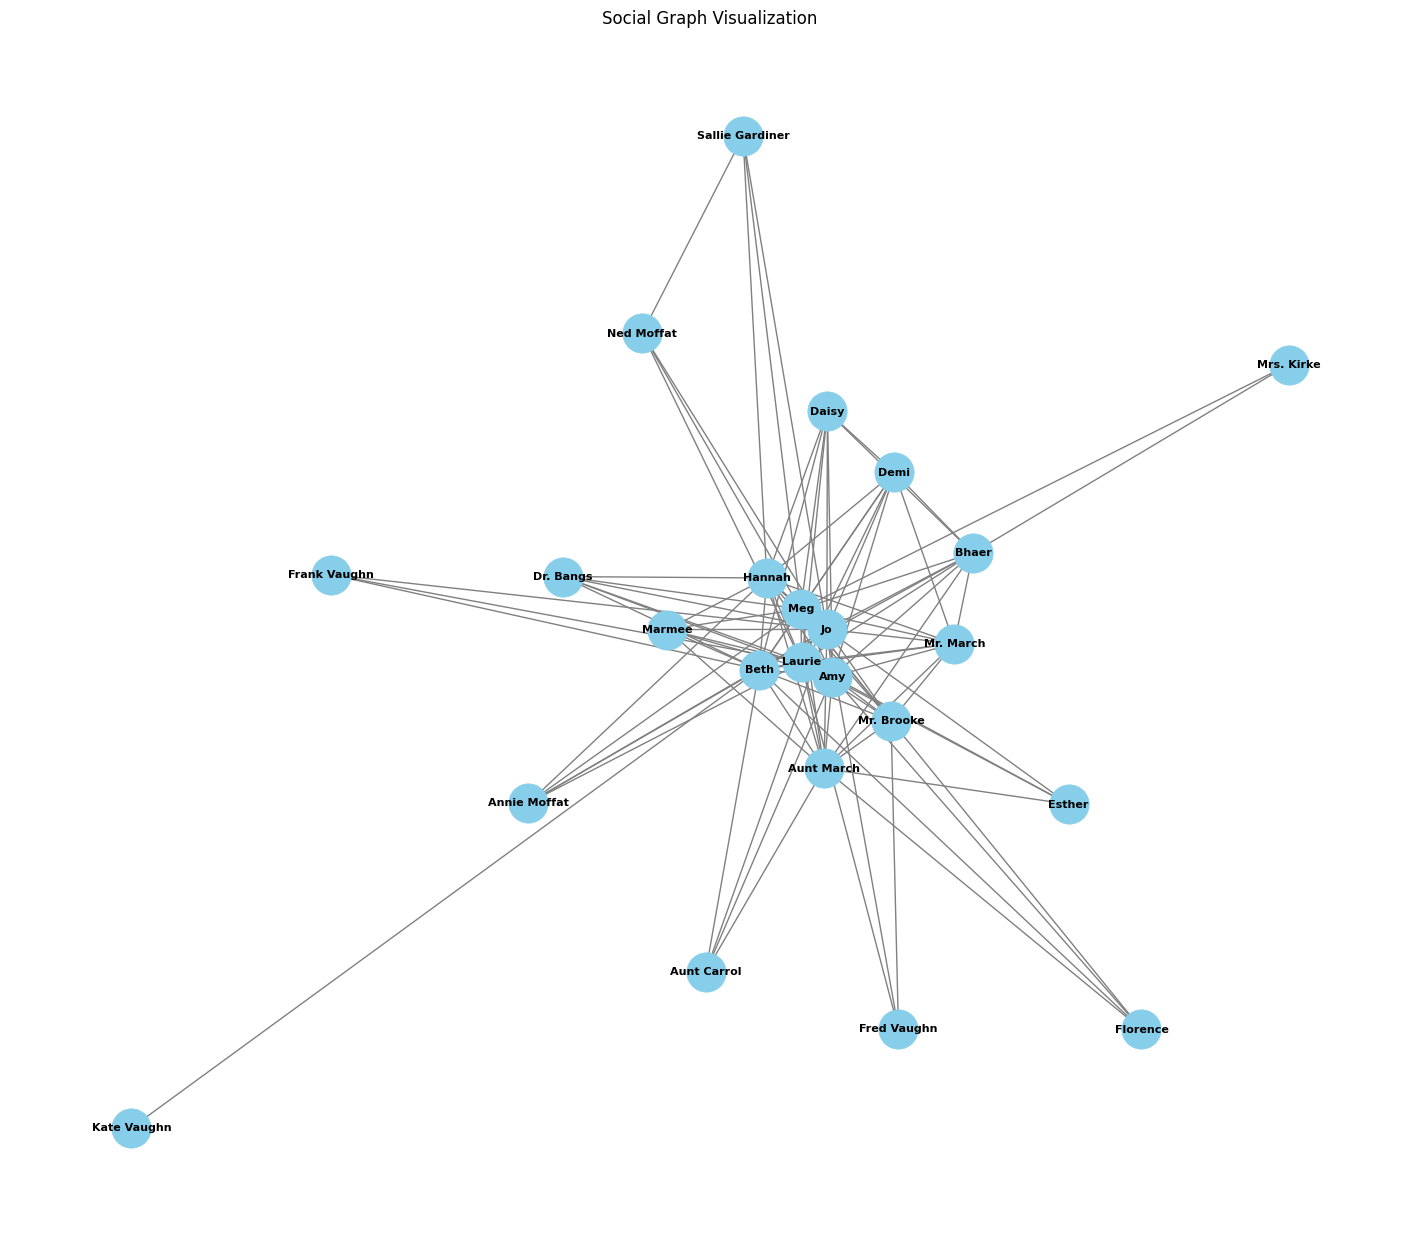

In [11]:
G = nx.Graph()
for paragraph in text.split('\n\n'):
    chars_in_paragraph = extract_characters_from_paragraph(paragraph)
    for char1 in chars_in_paragraph:
        for char2 in chars_in_paragraph:
            if char1 != char2:
                if not G.has_edge(char1, char2):
                    G.add_edge(char1, char2, weight=1)
                else:
                    G[char1][char2]['weight'] += 1

plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, font_size=8, node_color='skyblue', node_size=800,
        font_color='black', font_weight='bold', edge_color='gray', linewidths=0.5)
plt.title("Social Graph Visualization")
plt.show()

In [12]:
print("Nodes in the social graph:")
for node in G.nodes():
    print("-", node)

Nodes in the social graph:
- Meg
- Jo
- Beth
- Amy
- Marmee
- Hannah
- Aunt March
- Laurie
- Annie Moffat
- Florence
- Mr. Brooke
- Ned Moffat
- Sallie Gardiner
- Kate Vaughn
- Fred Vaughn
- Mr. March
- Dr. Bangs
- Esther
- Demi
- Daisy
- Aunt Carrol
- Frank Vaughn
- Bhaer
- Mrs. Kirke


In [13]:
print("\nEdges in the social graph:")
for edge in G.edges():
    print("-", edge)


Edges in the social graph:
- ('Meg', 'Jo')
- ('Meg', 'Amy')
- ('Meg', 'Beth')
- ('Meg', 'Marmee')
- ('Meg', 'Hannah')
- ('Meg', 'Laurie')
- ('Meg', 'Annie Moffat')
- ('Meg', 'Aunt March')
- ('Meg', 'Sallie Gardiner')
- ('Meg', 'Ned Moffat')
- ('Meg', 'Mr. Brooke')
- ('Meg', 'Mr. March')
- ('Meg', 'Dr. Bangs')
- ('Meg', 'Florence')
- ('Meg', 'Bhaer')
- ('Meg', 'Mrs. Kirke')
- ('Meg', 'Daisy')
- ('Meg', 'Demi')
- ('Jo', 'Beth')
- ('Jo', 'Amy')
- ('Jo', 'Marmee')
- ('Jo', 'Hannah')
- ('Jo', 'Aunt March')
- ('Jo', 'Laurie')
- ('Jo', 'Annie Moffat')
- ('Jo', 'Mr. Brooke')
- ('Jo', 'Fred Vaughn')
- ('Jo', 'Ned Moffat')
- ('Jo', 'Mr. March')
- ('Jo', 'Dr. Bangs')
- ('Jo', 'Esther')
- ('Jo', 'Sallie Gardiner')
- ('Jo', 'Daisy')
- ('Jo', 'Demi')
- ('Jo', 'Aunt Carrol')
- ('Jo', 'Frank Vaughn')
- ('Jo', 'Bhaer')
- ('Beth', 'Amy')
- ('Beth', 'Marmee')
- ('Beth', 'Hannah')
- ('Beth', 'Aunt March')
- ('Beth', 'Laurie')
- ('Beth', 'Annie Moffat')
- ('Beth', 'Kate Vaughn')
- ('Beth', 'Mr. Brooke')
-

In [14]:
random_graph = nx.erdos_renyi_graph(len(character_list), p=0.2)
preferential_attachment_graph = nx.barabasi_albert_graph(len(character_list), m=2)
small_world_graph = nx.watts_strogatz_graph(len(character_list), k=4, p=0.3)

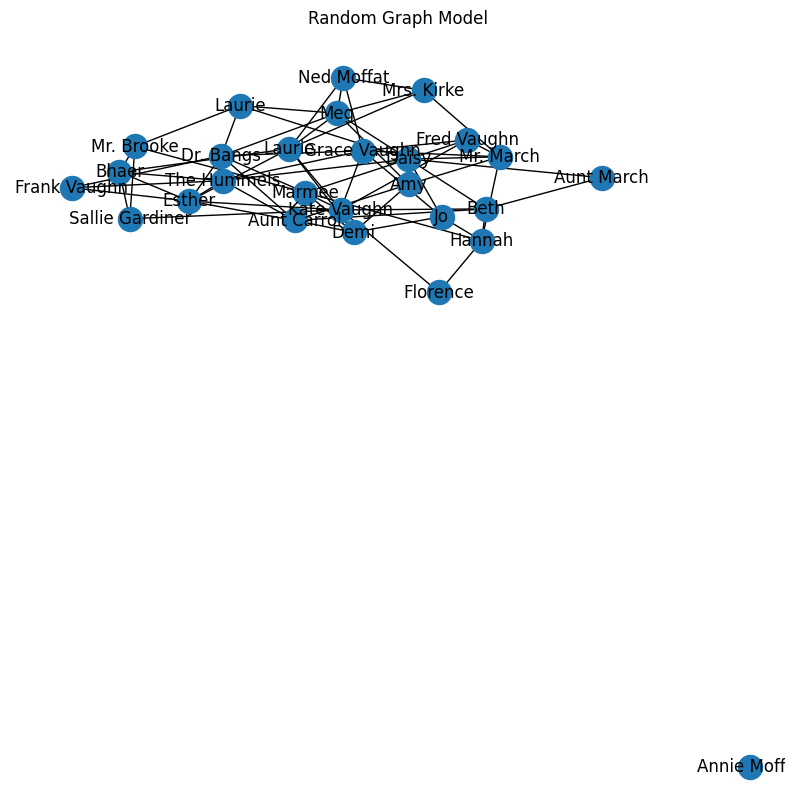

In [15]:
plt.figure(figsize=(10, 10))
plt.title("Random Graph Model")
nx.draw(random_graph, with_labels=True, labels=dict(enumerate(character_list)))
plt.show()

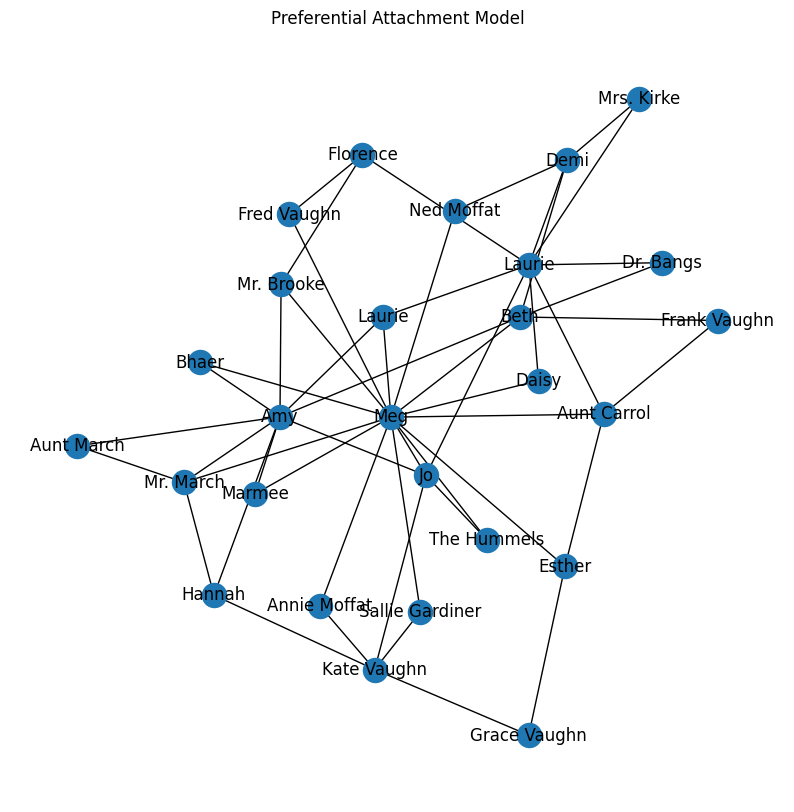

In [16]:
plt.figure(figsize=(10, 10))
plt.title("Preferential Attachment Model")
nx.draw(preferential_attachment_graph, with_labels=True, labels=dict(enumerate(character_list)))
plt.show()

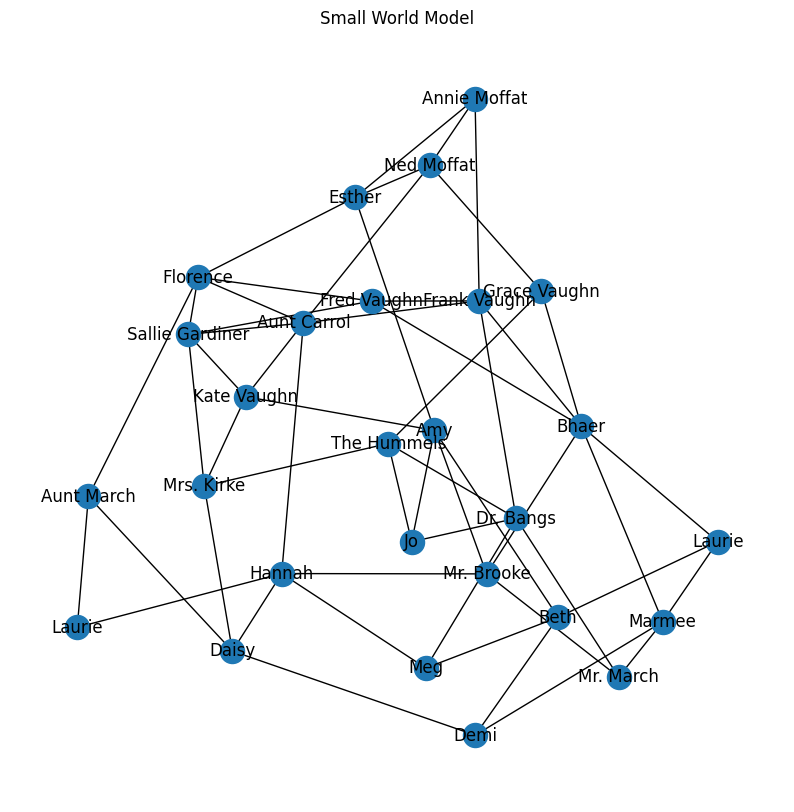

In [17]:
plt.figure(figsize=(10, 10))
plt.title("Small World Model")
nx.draw(small_world_graph, with_labels=True, labels=dict(enumerate(character_list)))
plt.show()

# Identifying Top 4 Protagonists

Top 4 Protagonists:  ['Jo', 'Meg', 'Beth', 'Laurie']


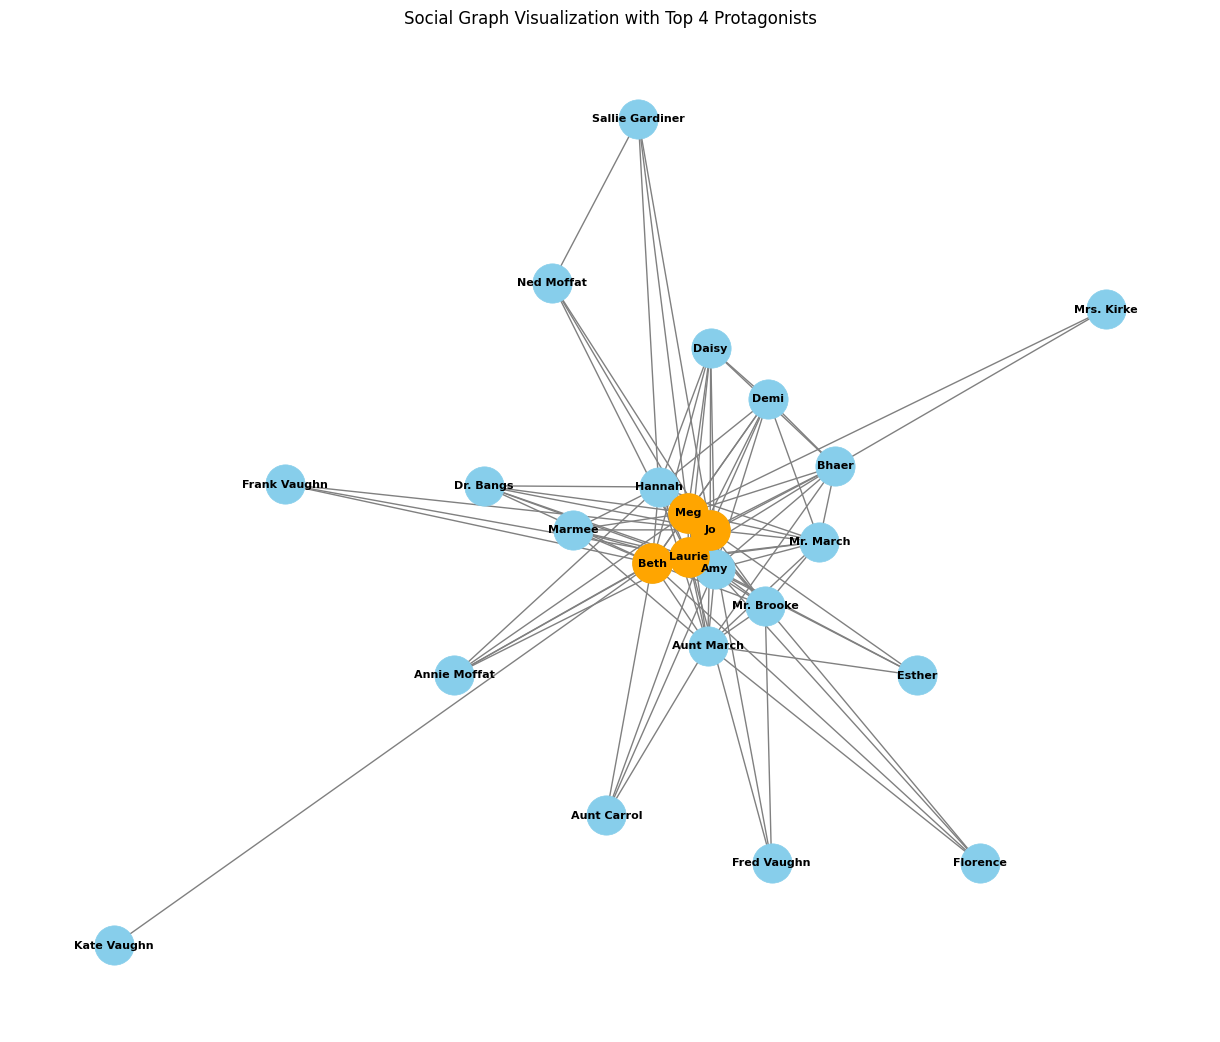

In [18]:
degree_centrality = nx.degree_centrality(G)
top4 = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:4]

print("Top 4 Protagonists: ", top4)

plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_size=8, node_color='skyblue', node_size=800,
        font_color='black', font_weight='bold', edge_color='gray', linewidths=0.5)

nx.draw_networkx_nodes(G, pos, nodelist=top4, node_color='orange', node_size=800)

plt.title("Social Graph Visualization with Top 4 Protagonists")
plt.show()

# Calculating Centrality for Main Protagonists

In [19]:
main_protagonists = ['Meg', 'Jo', 'Beth', 'Laurie']

degree_centrality = centrality.degree_centrality(G)
betweenness_centrality = centrality.betweenness_centrality(G)
closeness_centrality = centrality.closeness_centrality(G)
pagerank_centrality = nx.pagerank(G)

for protagonist in main_protagonists:
    print(f"Centrality measures for {protagonist}:")
    print(f"Degree Centrality: {degree_centrality.get(protagonist, 0)}")
    print(f"Betweenness Centrality: {betweenness_centrality.get(protagonist, 0)}")
    print(f"Closeness Centrality: {closeness_centrality.get(protagonist, 0)}")
    print(f"PageRank Centrality: {pagerank_centrality.get(protagonist, 0)}")
    print("--------------------------")

Centrality measures for Meg:
Degree Centrality: 0.7826086956521738
Betweenness Centrality: 0.13264320220841957
Closeness Centrality: 0.8214285714285714
PageRank Centrality: 0.12607811752767792
--------------------------
Centrality measures for Jo:
Degree Centrality: 0.8695652173913043
Betweenness Centrality: 0.1618263379132944
Closeness Centrality: 0.8846153846153846
PageRank Centrality: 0.21082079371665785
--------------------------
Centrality measures for Beth:
Degree Centrality: 0.7826086956521738
Betweenness Centrality: 0.1579396448961666
Closeness Centrality: 0.8214285714285714
PageRank Centrality: 0.10684720502777827
--------------------------
Centrality measures for Laurie:
Degree Centrality: 0.7826086956521738
Betweenness Centrality: 0.10352594265637742
Closeness Centrality: 0.8214285714285714
PageRank Centrality: 0.18433279575795045
--------------------------


# Extracting Ego Network & Local Clustering Coefficient

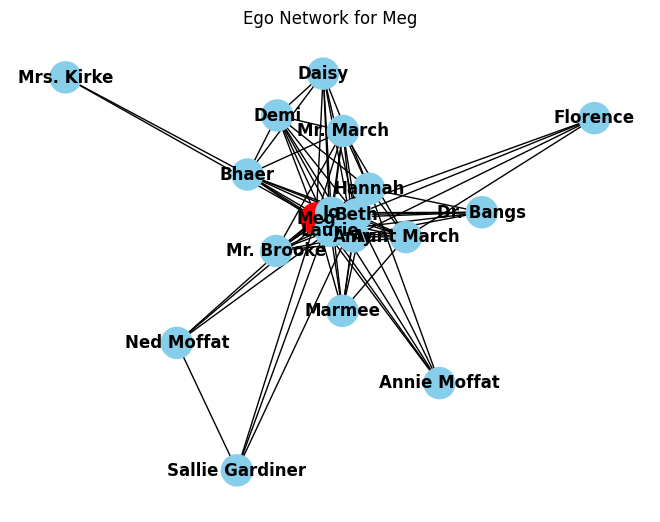

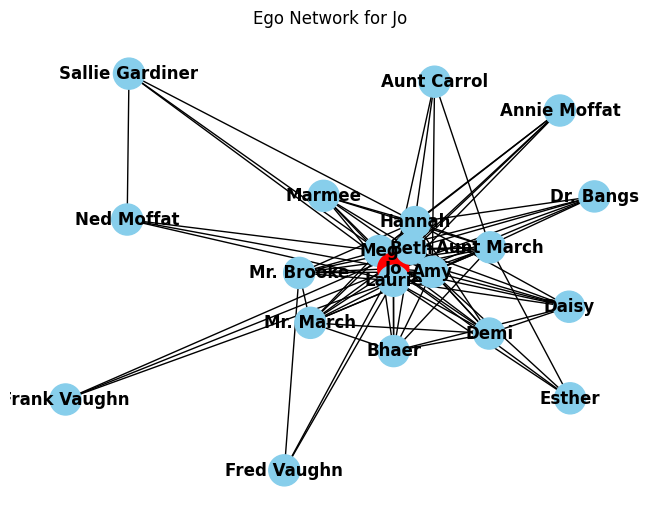

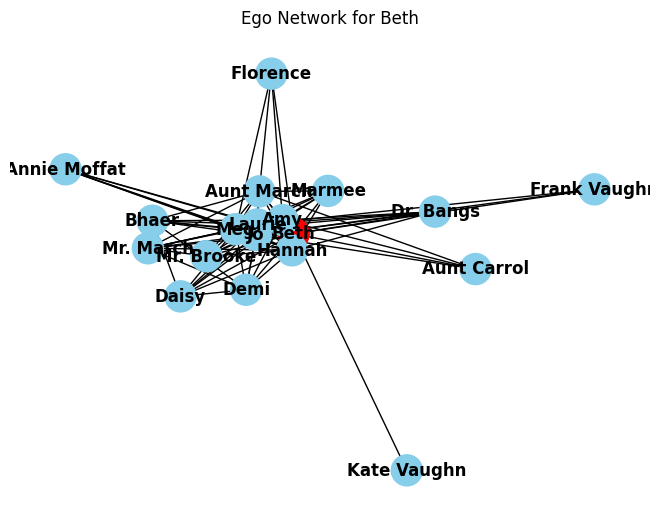

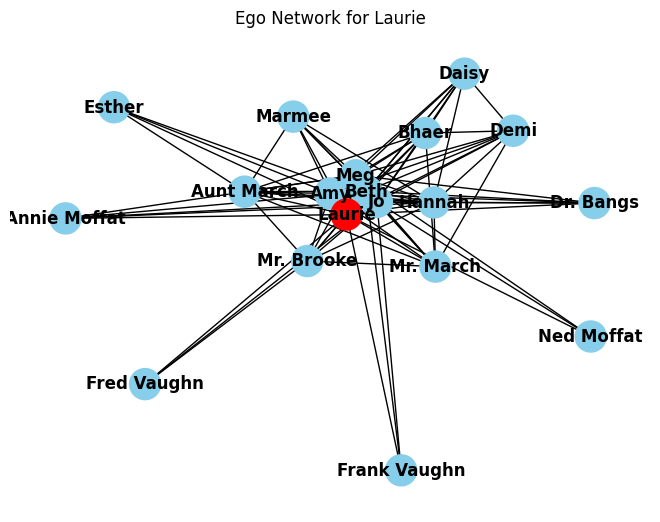

<Figure size 640x480 with 0 Axes>

In [20]:
for protagonist in main_protagonists:
    ego_network = nx.ego_graph(G, protagonist)
    node_color = ['skyblue' if node != protagonist else 'red' for node in ego_network.nodes()]

    pos = nx.spring_layout(ego_network)
    nx.draw(ego_network, pos, with_labels=True, font_weight='bold', node_color=node_color, node_size=500)

    plt.title(f"Ego Network for {protagonist}")
    plt.show()

    plt.figure()

Now printing local clustering coefficient along with ego network,

In [21]:
for protagonist in main_protagonists:
    try:
        ego_network = nx.ego_graph(G, protagonist)
        local_clustering_coefficient = nx.average_clustering(ego_network)

        print(f"Ego network and local clustering coefficient for {protagonist}:")
        print(f"Nodes in the ego network: {ego_network.nodes()}")
        print(f"Edges in the ego network: {ego_network.edges()}")
        print(f"Local Clustering Coefficient: {local_clustering_coefficient}")
        print("--------------------------")

    except nx.NetworkXError as e:
        print(f"Error for {protagonist}: {e}")

Ego network and local clustering coefficient for Meg:
Nodes in the ego network: ['Meg', 'Jo', 'Beth', 'Amy', 'Marmee', 'Hannah', 'Aunt March', 'Laurie', 'Annie Moffat', 'Florence', 'Mr. Brooke', 'Ned Moffat', 'Sallie Gardiner', 'Mr. March', 'Dr. Bangs', 'Demi', 'Daisy', 'Bhaer', 'Mrs. Kirke']
Edges in the ego network: [('Meg', 'Jo'), ('Meg', 'Amy'), ('Meg', 'Beth'), ('Meg', 'Marmee'), ('Meg', 'Hannah'), ('Meg', 'Laurie'), ('Meg', 'Annie Moffat'), ('Meg', 'Aunt March'), ('Meg', 'Sallie Gardiner'), ('Meg', 'Ned Moffat'), ('Meg', 'Mr. Brooke'), ('Meg', 'Mr. March'), ('Meg', 'Dr. Bangs'), ('Meg', 'Florence'), ('Meg', 'Bhaer'), ('Meg', 'Mrs. Kirke'), ('Meg', 'Daisy'), ('Meg', 'Demi'), ('Jo', 'Beth'), ('Jo', 'Amy'), ('Jo', 'Marmee'), ('Jo', 'Hannah'), ('Jo', 'Aunt March'), ('Jo', 'Laurie'), ('Jo', 'Annie Moffat'), ('Jo', 'Mr. Brooke'), ('Jo', 'Ned Moffat'), ('Jo', 'Mr. March'), ('Jo', 'Dr. Bangs'), ('Jo', 'Sallie Gardiner'), ('Jo', 'Daisy'), ('Jo', 'Demi'), ('Jo', 'Bhaer'), ('Beth', 'Amy'), 

# Detecting Communities

**Clique Percolation Method**

In [22]:
clique_percolation_communities = list(community.k_clique_communities(G, 3))
print("Clique Percolation Method Communities:", clique_percolation_communities)

Clique Percolation Method Communities: [frozenset({'Beth', 'Fred Vaughn', 'Frank Vaughn', 'Mr. March', 'Amy', 'Mr. Brooke', 'Demi', 'Florence', 'Ned Moffat', 'Jo', 'Aunt March', 'Sallie Gardiner', 'Hannah', 'Annie Moffat', 'Esther', 'Mrs. Kirke', 'Dr. Bangs', 'Bhaer', 'Marmee', 'Laurie', 'Meg', 'Aunt Carrol', 'Daisy'})]


**Girvan-Newman Algorithm**

In [23]:
gn_communities = list(nx.algorithms.community.girvan_newman(G))
print("Girvan Newman Communities:", gn_communities)

Girvan Newman Communities: [({'Demi', 'Florence', 'Aunt March', 'Sallie Gardiner', 'Hannah', 'Mrs. Kirke', 'Dr. Bangs', 'Marmee', 'Meg', 'Daisy', 'Beth', 'Fred Vaughn', 'Frank Vaughn', 'Mr. March', 'Amy', 'Mr. Brooke', 'Ned Moffat', 'Jo', 'Esther', 'Annie Moffat', 'Bhaer', 'Laurie', 'Aunt Carrol'}, {'Kate Vaughn'}), ({'Demi', 'Florence', 'Aunt March', 'Sallie Gardiner', 'Hannah', 'Dr. Bangs', 'Marmee', 'Meg', 'Daisy', 'Beth', 'Fred Vaughn', 'Frank Vaughn', 'Mr. March', 'Amy', 'Mr. Brooke', 'Ned Moffat', 'Jo', 'Esther', 'Annie Moffat', 'Bhaer', 'Laurie', 'Aunt Carrol'}, {'Kate Vaughn'}, {'Mrs. Kirke'}), ({'Demi', 'Florence', 'Aunt March', 'Sallie Gardiner', 'Hannah', 'Dr. Bangs', 'Marmee', 'Meg', 'Daisy', 'Beth', 'Frank Vaughn', 'Mr. March', 'Amy', 'Mr. Brooke', 'Ned Moffat', 'Jo', 'Esther', 'Annie Moffat', 'Bhaer', 'Laurie', 'Aunt Carrol'}, {'Kate Vaughn'}, {'Fred Vaughn'}, {'Mrs. Kirke'}), ({'Demi', 'Florence', 'Aunt March', 'Hannah', 'Dr. Bangs', 'Marmee', 'Meg', 'Daisy', 'Beth', 'Fr

**Modularity-based Louvain Algorithm**

In [24]:
louvain_communities = list(community.label_propagation_communities(G))
print("Louvain Communities:", louvain_communities)

Louvain Communities: [{'Demi', 'Florence', 'Aunt March', 'Sallie Gardiner', 'Hannah', 'Mrs. Kirke', 'Dr. Bangs', 'Marmee', 'Meg', 'Daisy', 'Beth', 'Fred Vaughn', 'Frank Vaughn', 'Mr. March', 'Amy', 'Mr. Brooke', 'Ned Moffat', 'Jo', 'Esther', 'Annie Moffat', 'Bhaer', 'Laurie', 'Aunt Carrol', 'Kate Vaughn'}]


# Creating Equivalent Generative Models of 50 Nodes

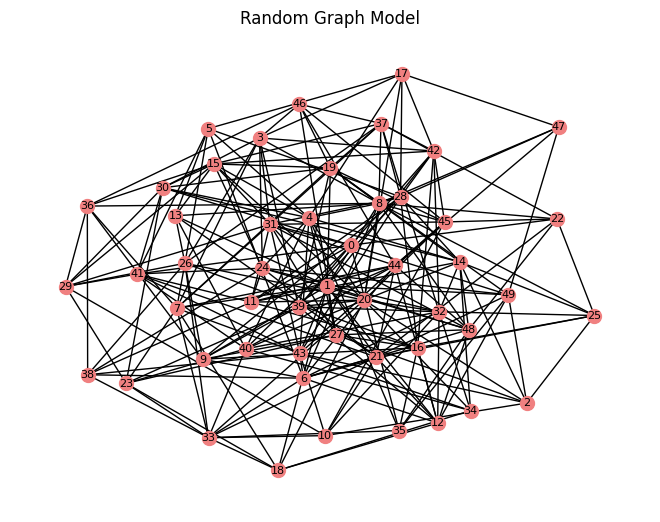

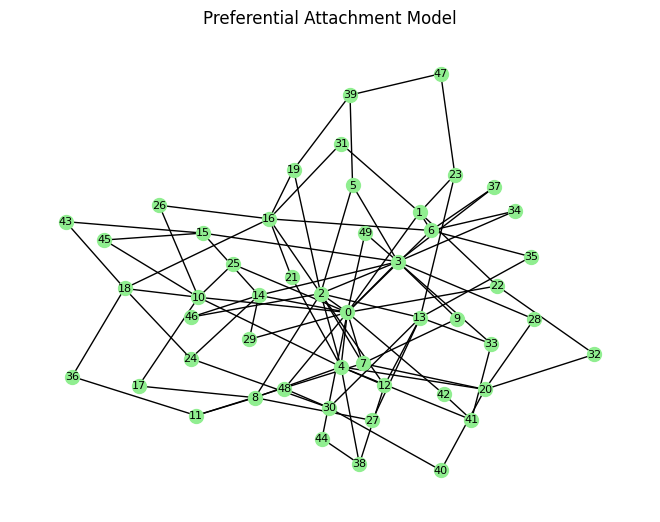

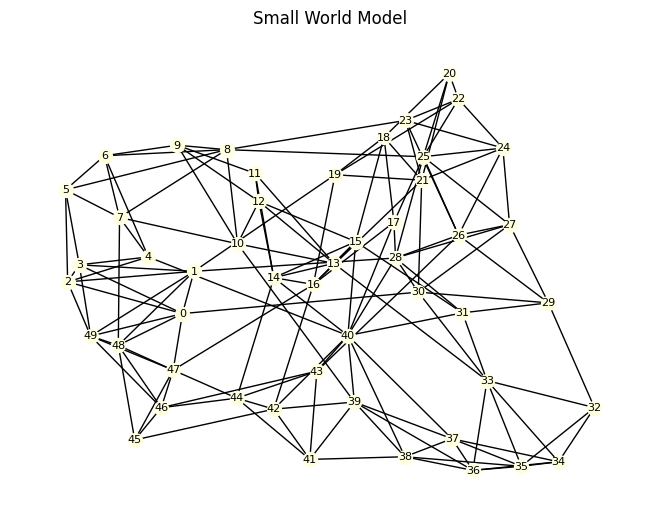

In [25]:
social_graph = G

# Random Graph Model
random_graph_model = nx.erdos_renyi_graph(50, 0.2)

# Preferential Attachment Model
preferential_attachment_model = nx.barabasi_albert_graph(50, 2)

# Small World Model
small_world_model = nx.watts_strogatz_graph(50, 6, 0.2)

pos_random = nx.spring_layout(random_graph_model)
nx.draw(random_graph_model, pos_random, with_labels=True, node_size=100, font_size=8, node_color='lightcoral')
plt.title("Random Graph Model")
plt.show()

pos_preferential = nx.spring_layout(preferential_attachment_model)
nx.draw(preferential_attachment_model, pos_preferential, with_labels=True, node_size=100, font_size=8, node_color='lightgreen')
plt.title("Preferential Attachment Model")
plt.show()

pos_small_world = nx.spring_layout(small_world_model)
nx.draw(small_world_model, pos_small_world, with_labels=True, node_size=100, font_size=8, node_color='lightyellow')
plt.title("Small World Model")
plt.show()

# Analysis

## A)

#### **Interpreting Centralities**
In the context of *Little Women*, the protagonists' centrality measures offer insights into their roles and significance within the intricate social network depicted in the novel.

From the above graphs, it is evident that the top 4 protagonists of *Little Women* are Jo March, Beth March, Laurie Laurence, and Meg March. The fourth March sister Amy March seems to have been less influential due to her low sentence appearance rate (co-occurrence).

Miss Josephine (Jo) March stands out as a central character due to her high degree centrality, reflecting her extensive connections with other characters. Her notable closeness centrality suggests that she is closely linked to various characters in the network.

Beth, Meg, and Laurie have similar centrality measures, suggesting comparable importance in the social structure.

<br>

#### **Interpreting Ego Networks & Local Clustering Coefficients**

1. Meg:
Meg's ego network includes a variety of characters such as Jo, Amy, Laurie, and others, showcasing her connections with different individuals. The high clustering coefficient indicates that the friends of Meg (nodes in her ego network) are also likely to be friends with each other. This suggests a cohesive and interconnected social circle around Meg.


2. Jo:
Jo's ego network involves characters like Meg, Laurie, Aunt March, and others, demonstrating a diverse set of connections. Similar to Meg, Jo's ego network exhibits a high clustering coefficient, emphasizing a tightly-knit group where individuals are connected to each other.


3. Beth:
Beth's ego network encompasses characters such as Meg, Jo, Laurie, and Aunt March, showcasing a mix of connections. While slightly lower than Meg and Jo, Beth's clustering coefficient remains high, indicating a community where her friends are also likely to be friends with each other.


4. Laurie:
Laurie's ego network includes Meg, Jo, Amy, and others, highlighting a range of connections. Laurie's ego network exhibits the highest clustering coefficient among the four. This suggests that his friends are tightly connected, forming a cohesive group.

The high local clustering coefficients for Meg, Jo, Beth, and Laurie indicate that their respective social circles are interconnected. The ego networks reveal diverse connections, with characters from different parts of the story forming part of the social circles.

While all characters have high clustering coefficients, Laurie stands out with the highest, indicating that his friends tend to form a closely-knit group.

<br>

#### **Interpreting Communities**

The CPM algorithm has identified groups of characters that are more densely connected to each other than to the rest of the network. In the context of *Little Women*, this community represents a cohesive group of characters who share significant interactions and relationships within the story.

Likewise, the Girvan-Newman Algorithm has identified certain communities that consist of single characters. This informs us that these characters (Kate Vaughn, Fred Vaughn, Mrs. Kirke, Ned Moffat, Sallie Gardiner, Dr. Bangs, Aunt Carrol, Esther and Florence) are not very influential and do not have strong interconnected relationships with other characters/protagonists of the novel (due to their low co-occurrence per sentence).

## B)

#### **Realism Asessment**

The social graph extracted from *Little Women* is a representation of the relationships between characters in a fictional narrative. Therefore, it is inherently based on fiction rather than real-world interactions.

While the graph is a creative construct, it exhibits some properties reminiscent of real-world social graphs such as network structure that captures the connections and interactions between characters in the story, resembling real-world social networks where individuals are linked by friendships, family ties, or other relationships.

<br>

The high local clustering coefficients observed in the ego networks suggest that, similar to real-world social networks, individuals within the same character's social circle are likely to be interconnected. This reflects the tendency of individuals in both fictional and real-world settings to form cohesive groups.

The ego networks of different characters include a mix of relationships with various individuals, mirroring the diversity seen in real-world social networks where individuals often interact with people from different parts of their lives.

The degree centrality of characters indicates their prominence and the number of connections they have. In real social networks, individuals with high degree centrality are often influential. In *Little Women*,  characters like Meg, Jo, Amy, and Laurie have high degree centrality, suggesting their importance in the story.

The identified communities through methods like the Clique Percolation Method, Girvan-Newman, and Louvain suggest groupings of characters that share strong connections. While these communities are fictional, they capture the essence of real-world social groups and affiliations.

<br>

In conclusion, the social graph of *Little Women* may not be based on real-world observations, but it incorporates realistic social network properties. The prominence of certain characters, the formation of tightly knit groups, and the identification of communities contribute to a narrative structure that aligns with real-world social dynamics. While the relationships are fictional, the social graph enhances the storytelling realism by incorporating elements reminiscent of genuine social networks.

Despite these similarities, it's important to note that the social graph derived from a fictional work lacks the authenticity and complexity of real-world social networks. The interactions and relationships among characters are crafted for narrative purposes, and the graph primarily serves as a tool for literary analysis rather than a reflection of real-world social dynamics.

## C)

#### **Story Dynamics**

The analysis provides some insights into the dynamics of the story, considering the centrality measures, ego networks, and community detection results:

1. Influence Despite Low Connectivity: Degree centrality measures the number of connections a character has. While characters like Meg and Jo may have higher degrees, indicating more direct connections, it doesn't necessarily mean characters with lower degrees are less influential. For example, Laurie has relatively fewer direct connections, but he appears to be influential within the network.

2. Hidden Connections: The community detection algorithms, such as Girvan-Newman and Louvain, identify groups of characters that have strong connections. Some characters may not have many direct connections, but they might belong to a cohesive group that becomes more evident later in the story. This reflects the idea of "not so visible" connections that become significant over time.

3. Ego Networks and Local Clustering: Examining ego networks and local clustering coefficients provides information about how tightly knit certain groups of characters are. A high local clustering coefficient indicates that characters in an ego network are well-connected to each other, forming a close-knit group. This can represent family or friendship dynamics within the story.


# Conclusion

In summary, the network analysis aligns well with the thematic elements of *Little Women*. It provides a structured and quantitative lens through which to view the intricate web of relationships, hidden alliances, and the evolving dynamics among characters in the novel. The insights gained from the analysis complement and enhance the understanding of the story's themes and character interactions.